# P-Values

Se muestrean 60 tornillos de una poblacion de la cual se conoce que la media de imperfecciones es 100 y la dispersion es 15 (mu=100, sigma=15.0), y se tiene como hipótesis alternativa que las medias muestrales están significativamente por encima o por debajo de la media de la población y como hipótesis nula que son comparables con cualquier muestra de 60 de la población y por ende la media muestral es esperada. Se realizan tests z para probar si las hipotesis nulas son o no verdad, el valor crítico es el p value 0.05 para el cual se acepta la hipotesis alternativa. 

In [69]:
% pylab inline
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import special


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Para N=10000 experimentos se muestra la distribución de los valores que toma z


-0.00853928704197


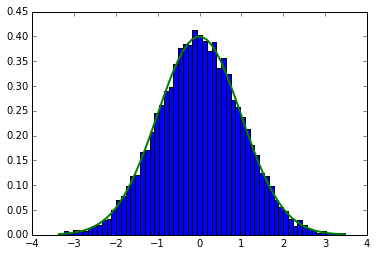

In [126]:

m=60
N=10000


mu, sigma = 100, 15 # mean and standard deviation
za=[]

for i in range(0,N):
    
    s = np.random.normal(mu, sigma, m)
    z= (np.mean(s)-mu)/(sigma/np.sqrt(m))
    za.append(z)
    
count, bins, ignored = plt.hist(za, m, normed=True)

w=np.mean(za)
f=np.std(za)


plt.plot( bins, (1/np.sqrt(2*np.pi*f**2))*np.exp((-(bins-w)**2)/(2*(f**2))) ,
         linewidth=2, color='g')

print w
plt.show()

Para z positivo se ve si el valor está significativamente arriba de la media poblacional y para z negativo se ve si el valor está significativamente por debajo de la media poblacional, se hace una histograma con la cuenta de p-values que se obtienen

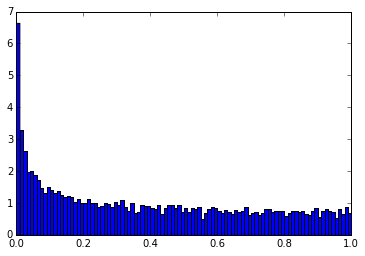

In [153]:

za2=[]
for i in range(0,N):
    if(za[i]>0):
        zau=(1-scipy.special.erf(za[i]))
    if(za[i]<0):
        zau=(scipy.special.erf(za[i])+1)
    za2.append(zau)
    
count, bins,ignored = plt.hist(za2,100, normed=True)



Ahora queremos ver como varian el maximo, el minimo y la media de la meta distribucion de p values con el numero de experimentos que se realizan (para 10000 se demora un poco en correr)

In [204]:
minN=[]
maxN=[]
meanN=[]
pminN=[]
pmaxN=[]
pmeanN=[]
Ns=[]
for N2 in range(100,10000,100):
    for i in range(0,N2):
    
        s = np.random.normal(mu, sigma, m)
        z= (np.mean(s)-mu)/(sigma/np.sqrt(m))
        za.append(z)
        if(za[i]>0):
            zau=(1-scipy.special.erf(za[i]))
        if(za[i]<0):
            zau=(scipy.special.erf(za[i])+1)
        za2.append(zau)

    minN.append(np.amin(histogram(za2,100,density=True )[0]))
    maxN.append(np.amax(histogram(za2,100,density=True )[0]))
    meanN.append(np.sum(histogram(za2,100,density=True)[0]*histogram(za2,100,density=True)[1][0:-1]))
    Ns.append(N2)
    



Grafica que muestra el cambio del maximo de la meta distribucion en funcion del numero de experimentos

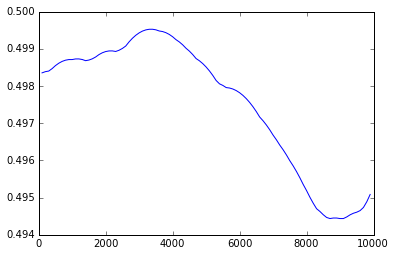

In [205]:
plot(Ns,minN)

Grafica que muestra el cambio del minimo de la meta distribucion en funcion del numero de experimentos

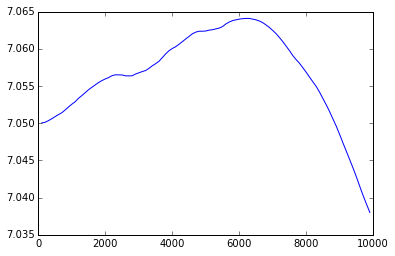

In [206]:
plot(Ns,maxN)

Grafica que muestra el cambio del promedio de la meta distribucion en funcion del numero de experimentos

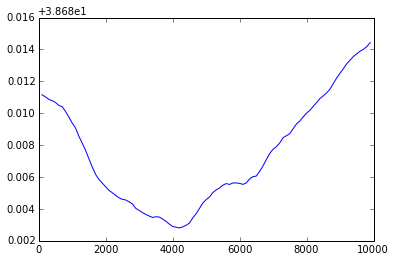

In [207]:
plot(Ns,meanN)

no se ve claramente pero la media de la meta distribucion es 0.3868 

In [216]:
np.sum(histogram(za2,100,density=True)[0]*histogram(za2,100,density=True)[1][0:-1]*(histogram(za2,100,density=True)[1][1]-histogram(za2,100,density=True)[1][0]))

0.38694349854901205